## Wrangle Exercises

***

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

***

__Step 1__

    Acquire the following from the Zillow DB for all 'Single Family Residential'
    properties:
    
    - bedroomcnt
    - bathroomcnt
    - calculatedfinishedsquarefeet
    - taxvaluedollarcnt
    - yearbuilt
    - taxamount
    - and fips

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import env

In [2]:
zillow_query = """
    SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
    FROM properties_2017
    WHERE propertylandusetypeid = 261;
"""
zillow_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/zillow'

In [3]:
zillow = pd.read_sql(zillow_query, zillow_url)
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


***

__Step 2__

Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

In [4]:
#Take a quick look at the data using .describe and .info
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [5]:
zillow.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


__Key Takeaways:__

* There are properties with no bathrooms or bedrooms listed. These may need to be removed.
* There are 2,152,863 total entries
* All datatypes are floats, but they don't need to be. May be due to null values.
* There is at least one property that has only 1 sq foot. Will need to investigate further.
* There is at least one property that has only 1 tax dollar value count. Will need to investigate further
* Average 3 bed, 2 bath, 1800 sq ft
* At least one property has 25 bedrooms listed. Does not sound 'single family'
* At least one property has 32 bathrooms listed. Does not sound 'single family'
* The largest property listed is 952,576 sq ft.

In [6]:
#Check for null values
zillow.isna().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [7]:
#Since there are over 2 million entries, I'm just going to drop the relatively few null values
zillow.dropna(inplace = True)

In [8]:
#Check the null count again, just to be sure
zillow.isna().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [9]:
#How many properties have 0 beds and 0 baths? They should probably be dropped
len(zillow[(zillow.bedroomcnt == 0) & (zillow.bathroomcnt == 0)])

3345

In [10]:
#Drop them
zillow = zillow[(zillow.bedroomcnt > 0) & (zillow.bathroomcnt > 0)]

In [11]:
#If a property has more than 5 bedrooms, it is probably not single family residential.
#Drop them
zillow = zillow[zillow.bedroomcnt <= 5]

In [12]:
#If a property has more than 3 bathrooms, it is probably not single family residential.
#Drop them
zillow = zillow[zillow.bathroomcnt <= 3]

In [13]:
#As of 2019, the average sq ft of a single family home was 2,500 sq ft. 
#Let's remove all the properties that are greater than 5,000 sq ft.
zillow = zillow[zillow.calculatedfinishedsquarefeet <= 5000]

In [14]:
#There are minimum requirements for the size of a house
#While these rules vary from state to state, it seems that a good rule of thumb is:
#A home must have 120sq ft per bedroom. No area regs on bathrooms
#Drop properties that do not meet this general rule
zillow = zillow[zillow.calculatedfinishedsquarefeet >= (120 * zillow.bedroomcnt)]

In [15]:
#Now convert bedroomcnt, calculatedfinishedsquarefeet, and taxvaluedollarcnt to ints
zillow.bedroomcnt = zillow.bedroomcnt.astype(int)
zillow.calculatedfinishedsquarefeet = zillow.calculatedfinishedsquarefeet.astype(int)
zillow.taxvaluedollarcnt = zillow.taxvaluedollarcnt.astype(int)

In [16]:
#fips and yearbuilt seem to be categorical, so I'm going to change those to object types
#That should be helpful when exploring the data
zillow.fips = zillow.fips.astype(object)
zillow.yearbuilt = zillow.yearbuilt.astype(object)

In [17]:
#I also want to rename the columns to be more understandable and easier to read
zillow.rename(columns = {'bedroomcnt':'bedroom_count',
                        'bathroomcnt':'bathroom_count',
                        'calculatedfinishedsquarefeet':'area (sq-ft)',
                        'taxvaluedollarcnt':'tax_value',
                        'yearbuilt':'year_built',
                        'taxamount':'tax_amount'}, inplace = True)

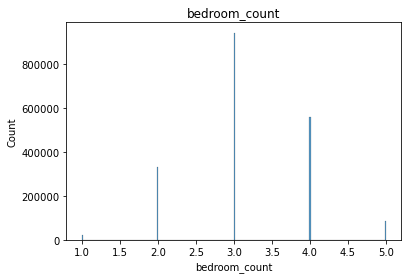

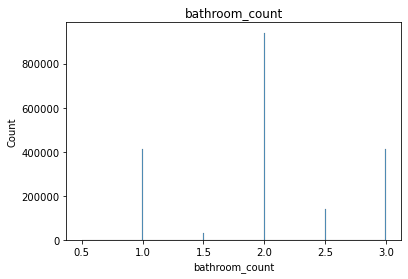

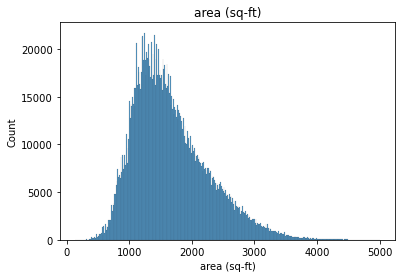

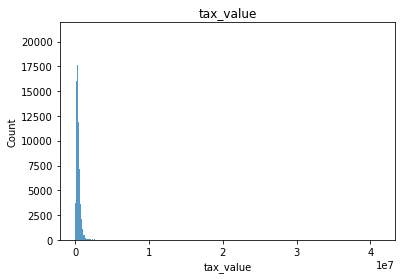

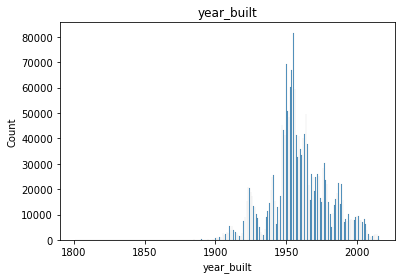

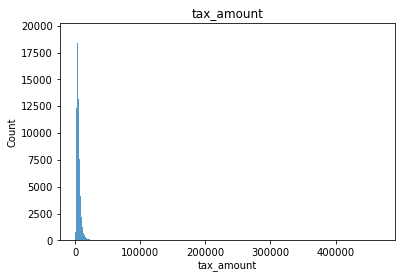

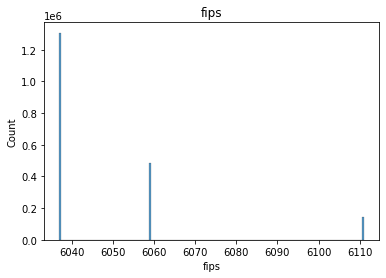

In [18]:
#Plot the individual distributions
for col in zillow.columns:
    sns.histplot(x = col, data = zillow)
    plt.title(col)
    plt.show()

In [19]:
#Based on the taxamount graph above, which is very right skewed
#I think it would be acceptable to drop all properties where 
#taxamount > 20,000
zillow = zillow[zillow.tax_amount <= 20_000]

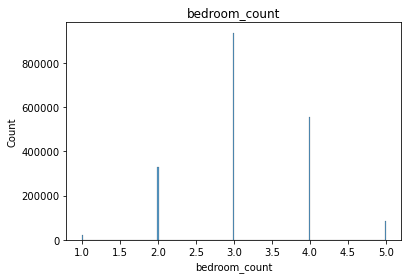

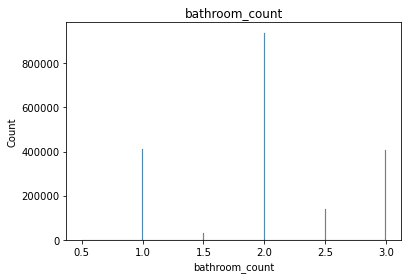

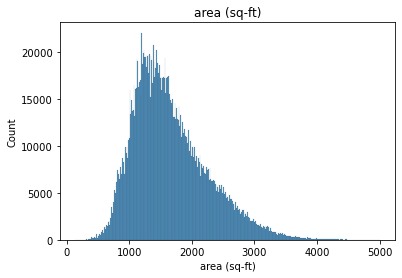

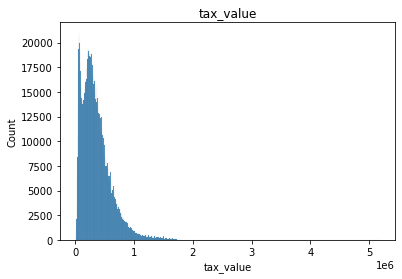

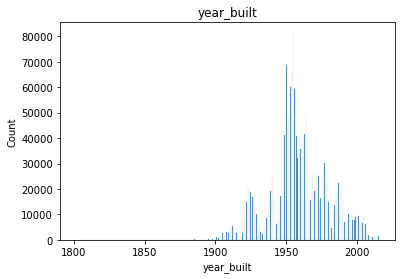

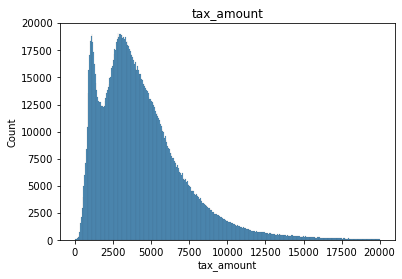

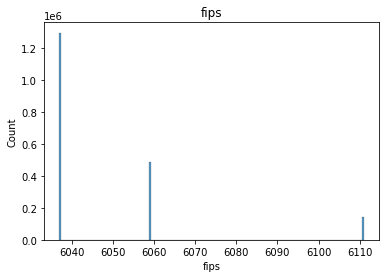

In [20]:
#Plot the individual distributions again
for col in zillow.columns:
    sns.histplot(x = col, data = zillow)
    plt.title(col)
    plt.show()

In [21]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [22]:
zillow.info()
zillow.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927087 entries, 4 to 2152861
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bedroom_count   int64  
 1   bathroom_count  float64
 2   area (sq-ft)    int64  
 3   tax_value       int64  
 4   year_built      object 
 5   tax_amount      float64
 6   fips            object 
dtypes: float64(2), int64(3), object(2)
memory usage: 117.6+ MB


,bedroom_count,bathroom_count,area (sq-ft),tax_value,tax_amount
count,1.927087e+06,1.927087e+06,1.927087e+06,1.927087e+06,1.927087e+06
mean,3.180738e+00,2.026438e+00,1.661441e+03,3.568088e+05,4.418656e+03
std,8.058644e-01,6.677273e-01,5.932493e+02,2.544180e+05,2.916898e+03
min,1.000000e+00,5.000000e-01,1.400000e+02,2.200000e+01,1.648000e+01
25%,3.000000e+00,2.000000e+00,1.227000e+03,1.764430e+05,2.397420e+03
50%,3.000000e+00,2.000000e+00,1.551000e+03,3.037500e+05,3.830130e+03
75%,4.000000e+00,2.500000e+00,2.000000e+03,4.731990e+05,5.729040e+03
max,5.000000e+00,3.000000e+00,5.000000e+03,5.177673e+06,1.999984e+04


In [23]:
#For Testing
zillow_without_outliers = remove_outliers(zillow, 2.5, zillow.columns)

In [24]:
zillow_without_outliers.info()
zillow_without_outliers.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893720 entries, 4 to 2152861
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bedroom_count   int64  
 1   bathroom_count  float64
 2   area (sq-ft)    int64  
 3   tax_value       int64  
 4   year_built      object 
 5   tax_amount      float64
 6   fips            object 
dtypes: float64(2), int64(3), object(2)
memory usage: 115.6+ MB


,bedroom_count,bathroom_count,area (sq-ft),tax_value,tax_amount
count,1.893720e+06,1.893720e+06,1.893720e+06,1.893720e+06,1.893720e+06
mean,3.177267e+00,2.017652e+00,1.646459e+03,3.409281e+05,4.232509e+03
std,8.045098e-01,6.652548e-01,5.761559e+02,2.219677e+05,2.537049e+03
min,1.000000e+00,1.000000e+00,1.400000e+02,2.200000e+01,1.648000e+01
25%,3.000000e+00,2.000000e+00,1.224000e+03,1.742360e+05,2.370960e+03
50%,3.000000e+00,2.000000e+00,1.542000e+03,2.993875e+05,3.779660e+03
75%,4.000000e+00,2.500000e+00,1.980000e+03,4.625062e+05,5.608480e+03
max,5.000000e+00,3.000000e+00,3.932000e+03,1.211874e+06,1.377130e+04


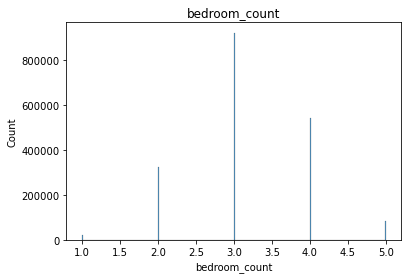

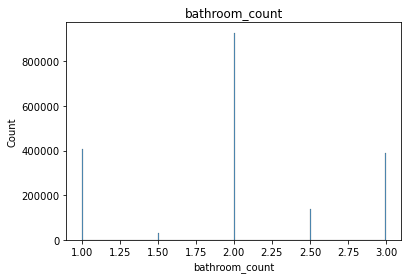

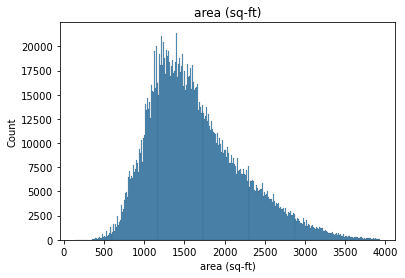

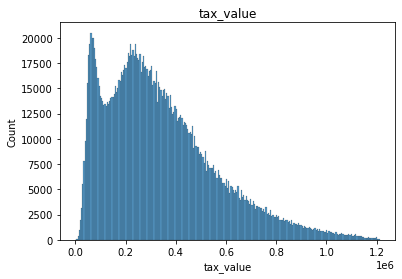

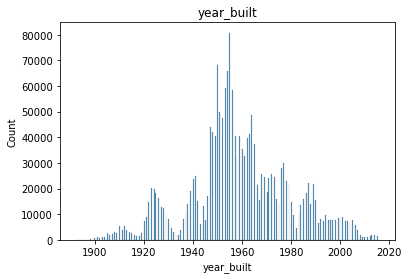

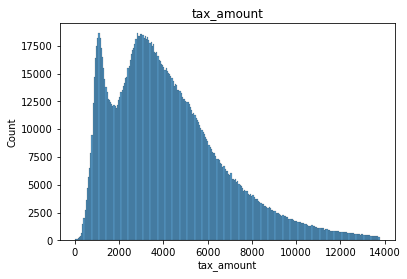

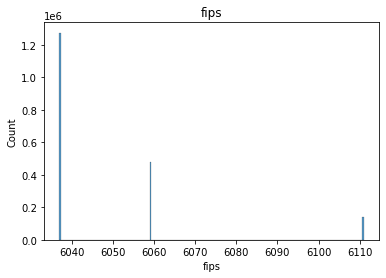

In [25]:
#Plot the individual distributions again
for col in zillow_without_outliers.columns:
    sns.histplot(x = col, data = zillow_without_outliers)
    plt.title(col)
    plt.show()

__Note__

I'm going stop cleaning and preparing at this point so that I can move forward with the assignment. However, I would like to go back and see if I can't clean it up some more after I have an MVP set up for the project.

***

__Step 3__

Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [26]:
#For Testing
import wrangle

In [27]:
#Reset the zillow df
zillow = []

In [28]:
#Use wrangle.wrangle_zillow to acquire and prepare df
zillow = wrangle.wrangle_zillow()

In [30]:
zillow.info()
zillow.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893720 entries, 4 to 2152861
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bedroom_count   int64  
 1   bathroom_count  float64
 2   area (sq-ft)    int64  
 3   tax_value       int64  
 4   year_built      object 
 5   tax_amount      float64
 6   fips            object 
dtypes: float64(2), int64(3), object(2)
memory usage: 115.6+ MB


,bedroom_count,bathroom_count,area (sq-ft),tax_value,tax_amount
count,1.893720e+06,1.893720e+06,1.893720e+06,1.893720e+06,1.893720e+06
mean,3.177267e+00,2.017652e+00,1.646459e+03,3.409281e+05,4.232509e+03
std,8.045098e-01,6.652548e-01,5.761559e+02,2.219677e+05,2.537049e+03
min,1.000000e+00,1.000000e+00,1.400000e+02,2.200000e+01,1.648000e+01
25%,3.000000e+00,2.000000e+00,1.224000e+03,1.742360e+05,2.370960e+03
50%,3.000000e+00,2.000000e+00,1.542000e+03,2.993875e+05,3.779660e+03
75%,4.000000e+00,2.500000e+00,1.980000e+03,4.625062e+05,5.608480e+03
max,5.000000e+00,3.000000e+00,3.932000e+03,1.211874e+06,1.377130e+04


In [31]:
zillow.head()

,bedroom_count,bathroom_count,area (sq-ft),tax_value,year_built,tax_amount,fips
4,4,2.0,3633,296425,2005.0,6941.39,6037.0
7,3,2.0,2077,646760,1926.0,7924.68,6037.0
18,3,1.0,1244,169471,1950.0,2532.88,6037.0
19,3,2.0,1300,233266,1950.0,3110.99,6037.0
20,3,2.0,1222,290492,1951.0,3870.25,6037.0


In [29]:
#Testing successful